In [279]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import spacy
# spacy.cli.download("es_core_news_sm")
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
from ipywidgets import widgets, interact, interactive, Checkbox, IntSlider
from IPython.display import display, clear_output

# WORDCLOUD DISPLAY MASK
words_mask = np.array(Image.open("assets/silhouette.jpg").convert("L")) #Loading a black and white image with convert("L") to transform it to greyscale
words_mask = np.where(words_mask > 128, 255, 0) #Clamping the greyscale values to 0 or 255

# DATA
data = pd.read_excel('assets/ResultadosFinales Public.xlsx', header=[0, 1], index_col=[0, 1]) #Loading the survey data from an excel doc that has its first two rows as headers

In [280]:
q1_text = data.columns[23][0][3:]
q2_text = data.columns[49][0][4:]
data.columns = data.columns.droplevel(0)
data = data[data['Total de Respuestas']>0]
data = data.iloc[:, [23,24,25,26,27,48,49,50,51,52,53]]

data['q1_mean'] = (data.iloc[:, 0:5].mul([0,1,2,3,4], axis=1).sum(axis=1) / data.iloc[:, 0:5].sum(axis=1)).round()
data['q2_mean'] = (data.iloc[:, 5:10].mul([0,1,2,3,4], axis=1).sum(axis=1) / data.iloc[:, 5:10].sum(axis=1)).round()

data.head()

,ID del Curso,Siempre,Casi siempre,Algunas veces,Casi nunca,Nunca,Muy buena,Buena,Regular,Mala,Muy mala,Comentario,q1_mean,q2_mean
0,32896-1,7.0,4.0,3.0,1.0,0.0,10.0,4.0,1.0,0.0,0.0,#1. Nada\n#2. En que trate de hacer los temas ...,1.0,0.0
1,32896-10,3.0,4.0,5.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,"#1. En brindar las rubricad adecuadas, silabos...",2.0,1.0
2,32896-11,14.0,1.0,1.0,0.0,0.0,14.0,2.0,0.0,0.0,0.0,"#1. Esta acordé con su enseñanza, muy didáctic...",0.0,0.0
3,32896-2,5.0,9.0,2.0,1.0,0.0,9.0,6.0,3.0,0.0,0.0,"#1. el metodo de ensayo, un grupo de alumnos t...",1.0,1.0
4,32896-3,10.0,2.0,1.0,0.0,0.0,11.0,2.0,0.0,0.0,0.0,#1. En terminar la clase a tiempo\n#2. Nada\n#...,0.0,0.0


In [281]:
comments = data.iloc[:,10]
lemmatized_list = []
for comment in comments:
    tokenized = nlp(str(comment))
    lemmas = [token.lemma_ for token in tokenized]
    lemmatized_list.append(lemmas)

# STOP WORDS FILTER
with open("assets/stop_words_spanish_no_verbs.json", "r", encoding="utf-8") as file:
    stop_words = json.load(file)
stop_words = sum(stop_words.values(), []) #Combining all the lists from the dictionary into one single list

filtered_lemmatized_list = [[word for word in sublist if word not in stop_words and not word.isdigit()] for sublist in lemmatized_list]

data['Comments_lemmatized'] = filtered_lemmatized_list
data['number_of_words'] = data['Comments_lemmatized'].apply(lambda word_list: len(word_list))

data.head()

,ID del Curso,Siempre,Casi siempre,Algunas veces,Casi nunca,Nunca,Muy buena,Buena,Regular,Mala,Muy mala,Comentario,q1_mean,q2_mean,Comments_lemmatized,number_of_words
0,32896-1,7.0,4.0,3.0,1.0,0.0,10.0,4.0,1.0,0.0,0.0,#1. Nada\n#2. En que trate de hacer los temas ...,1.0,0.0,"[nada, tratar, hacer, tema, más, sencillo, ent...",84
1,32896-10,3.0,4.0,5.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,"#1. En brindar las rubricad adecuadas, silabos...",2.0,1.0,"[brindar, rubricad, adecuado, silabo, adecuado...",118
2,32896-11,14.0,1.0,1.0,0.0,0.0,14.0,2.0,0.0,0.0,0.0,"#1. Esta acordé con su enseñanza, muy didáctic...",0.0,0.0,"[este, acordar, su, enseñanza, mucho, didáctic...",47
3,32896-2,5.0,9.0,2.0,1.0,0.0,9.0,6.0,3.0,0.0,0.0,"#1. el metodo de ensayo, un grupo de alumnos t...",1.0,1.0,"[metodo, ensayo, uno, grupo, alumno, tener, me...",56
4,32896-3,10.0,2.0,1.0,0.0,0.0,11.0,2.0,0.0,0.0,0.0,#1. En terminar la clase a tiempo\n#2. Nada\n#...,0.0,0.0,"[terminar, clase, tiempo, nada, mm, parecer, c...",20


In [ ]:
nlp = spacy.load("es_core_news_sm")

widget_q1_checkbox = Checkbox(
    value=False,
    description="Enable filter",
    disabled=False
)
widget_q2_checkbox = Checkbox(
    value=False,
    description="Enable filter",
    disabled=False
)
widget_q1_slider = IntSlider(
    value=2,
    min=0,
    max=4,
    step=1,
    description="Question's 1 mean closer to:",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
widget_q2_slider = IntSlider(
    value=2,
    min=0,
    max=4,
    step=1,
    description="Question's 2 mean closer to:",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
widget_letter_slider = IntSlider(
    value=3,
    min=1,
    max=30,
    step=1,
    description='Minimum letters per word:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

def update(change):
    print(f"slider1 = {widget_q1_slider.value}")
    filtered_data = data
    
    if widget_q1_checkbox.value:
        filtered_data = filtered_data[filtered_data['q1_mean']==widget_q1_slider.value]
    if widget_q2_checkbox.value:
        filtered_data = filtered_data[filtered_data['q2_mean']==widget_q2_slider.value]

    # QUESTION 1
    data_q1 = filtered_data.iloc[:, [0,1,2,3,4]]
    data_q1 = data_q1.sum()
    total_sum_q1 = data_q1.sum()
    data_q1 = (data_q1/total_sum_q1*100).dropna()
    color = 'blue' if widget_q1_slider.value else 'red'
    axes[0].bar(data_q1.index, data_q1.values, color=color)
    axes[0].set_title(q1_text)
    # QUESTION 2
    data_q2 = filtered_data.iloc[:, [5,6,7,8,9]]
    data_q2 = data_q2.sum()
    total_sum_q2 = data_q2.sum()
    data_q2 = (data_q2/total_sum_q2*100).dropna()
    color = 'blue' if widget_q2_slider.value else 'red'
    axes[1].pie(data_q2.values, labels=data_q2.index, autopct='%1.1f%%')
    axes[1].set_title(q2_text)
    # WORD CLOUD
    words_all = data['Comments_lemmatized'].apply(lambda word_list: [word for word in word_list if len(word) >= widget_letter_slider.value])
    words_all = words_all.apply(" ".join)
    words_all = " ".join(words_all.values)
    wc = WordCloud(background_color="white", max_words=100, mask=words_mask, contour_width=3, contour_color='steelblue')
    wc = wc.generate(words_all)
    axes[2].axis("off")
    axes[2].imshow(wc, interpolation="bilinear")
    # SCATTER PLOT
    num_words = filtered_data['number_of_words']
    x_jittered = [1]*len(num_words) + np.random.normal(loc=0, scale=0.06, size=len(num_words))
    axes[3].scatter(x_jittered, num_words.values, color='blue', alpha=0.7, edgecolors='black', s=100)
    axes[3].set_xlabel("")
    axes[3].set_xticks([])
    axes[3].set_title("How many words were used in the comment section")

    # fig.canvas.draw_idle()
    # plt.tight_layout()
    # plt.show()
    
widget_q1_slider.observe(update, names="value")
widget_q1_checkbox.observe(update, names="value")
widget_q2_slider.observe(update, names="value")
widget_q2_checkbox.observe(update, names="value")
widget_letter_slider.observe(update, names="value")

hbox1 = widgets.HBox([widget_q1_checkbox, widget_q1_slider, widget_q2_checkbox, widget_q2_slider])
hbox2 = widgets.HBox([widget_letter_slider])
vbox = widgets.VBox([hbox1,hbox2])

display(vbox)

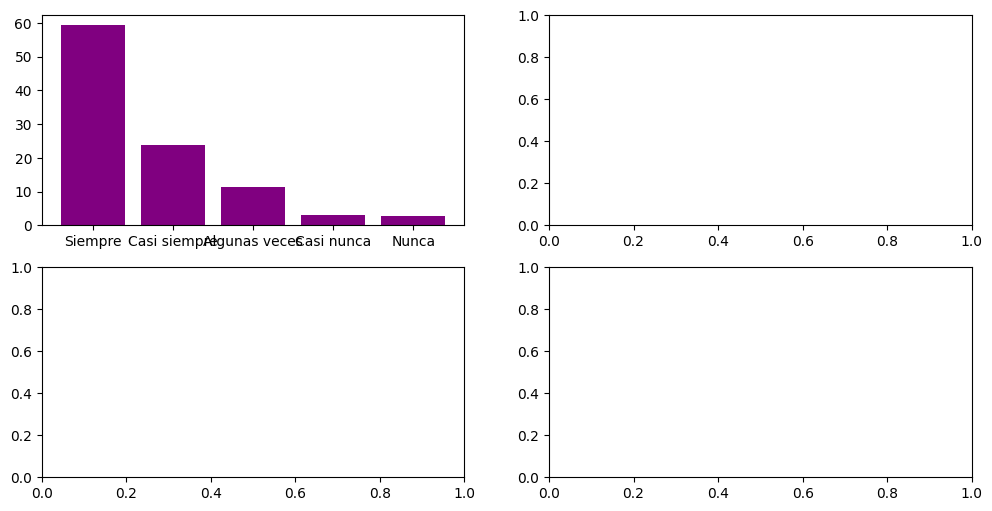

PRUEBA 3 q1
PRUEBA 4 q1
PRUEBA 2 q1


In [283]:
widget_q2_slider = IntSlider(
    value=2,
    min=0,
    max=4,
    step=1,
    description="Question's 2 mean closer to:",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='400px',margin='10px'),
    style={'description_width': '200px'}
)
widget_q1_slider = IntSlider(
    value=2,
    min=0,
    max=4,
    step=1,
    description="Question's 1 mean closer to:",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='500px',margin='10px'),
    style={'description_width': '200px'}
)

data_q1 = data.iloc[:, [0,1,2,3,4]]
data_q1 = data_q1.sum()
total_sum_q1 = data_q1.sum()
data_q1 = (data_q1/total_sum_q1*100).dropna()


fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()
axes[0].bar(data_q1.index, data_q1.values, color='purple')

def update(change):
    print(f"PRUEBA {widget_q1_slider.value} q1")
    
    axes[0].cla() 
    color = 'blue' if widget_q1_slider.value == 4 else 'green'
    axes[0].bar(data_q1.index, data_q1.values, color=color)
    fig.canvas.draw_idle()
    # plt.show()

widget_q1_slider.observe(update, names="value")
widget_q2_slider.observe(update, names="value")

hbox = widgets.HBox([widget_q1_slider, widget_q2_slider])
display(hbox)

# display(fig)

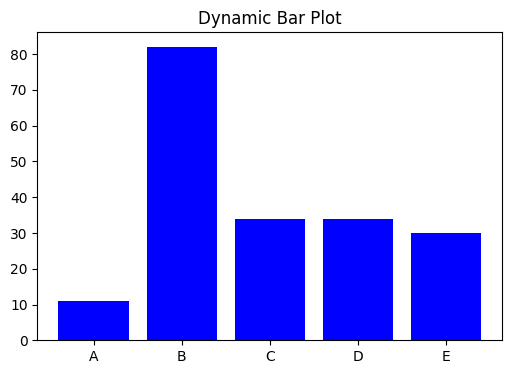

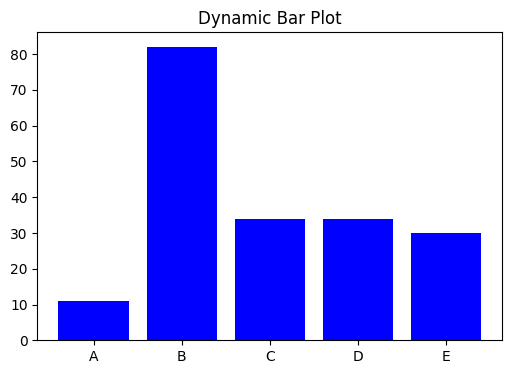

In [289]:
categories = ["A", "B", "C", "D", "E"]
values = np.random.randint(10, 100, size=5)

# Create figure
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(categories, values, color='blue')
ax.set_title("Dynamic Bar Plot")

# Create Sliders
color_slider = widgets.IntSlider(value=1, min=1, max=3, step=1, description="Color")
size_slider = widgets.IntSlider(value=5, min=5, max=15, step=1, description="Size")

# Function to Update Plot
def update(change):
    # Change bar color based on color_slider value
    color_map = {1: 'blue', 2: 'red', 3: 'green'}
    new_color = color_map[color_slider.value]
    
    for bar in bars:
        bar.set_color(new_color)

    fig.canvas.draw_idle()  # Refresh the plot

# Attach update function to color slider
color_slider.observe(update, names="value")

# Display Sliders (Side by Side) and Plot (Below)
display(widgets.HBox([color_slider, size_slider]))
display(fig)